# Introduction

This project is going to predict if there is any correlation between the growth of GDP and increase in Life expectency in 6 countries.

Main Questions to be answered:
    
+ What is the relationship between country's GDP Vs  Life Expectancy 
+ Rate of growth of GDP in a country vs the increase in life expectency (Finding countries where life expectency increased eventhough no significant change happened in GDP)
+ Whose life expectancy increased more the country with the worst life expectency or the best
+ Comparision of life expectencies of 6 countries in 2000's and their increment in 15 years
+ Whose GDP increased most



### Importing required python module

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st

### Loading the csv data

Loading data in a dataframe and performing a few basic inspections

In [3]:
#Loading the contents of all_data.csv into a dataframe called df
df=pd.read_csv('all_data.csv')
print(df.head())
print(df.isna().sum())
print(df.dtypes)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


### Data Tidying

In our dataset we have 6 countries namely :- [Chile,China,Germany,US,Mexico,Zimbabwe]
And the columns in our dataset are Country,Year,Life expectancy at birth (years),GDP

Let's rename Life expectancy at birth (years) to life_exp for convenience

In [4]:
#Renaming our column for ease
df=df.rename(columns={'Life expectancy at birth (years)':"life_exp"})
df.columns

Index(['Country', 'Year', 'life_exp', 'GDP'], dtype='object')

### Plotting a graph to visualize correlationship between GDP and Life Expectency

The Correlation of Chile's GDP and Life expectancy is  0.9498766659254412
The Correlation of China's GDP and Life expectancy is  0.9085255408648357
The Correlation of Germany's GDP and Life expectancy is  0.932698898256127
The Correlation of Mexico's GDP and Life expectancy is  0.932237716784708
The Correlation of United States of America's GDP and Life expectancy is  0.9817092382430257
The Correlation of Zimbabwe's GDP and Life expectancy is  0.9661998955858778


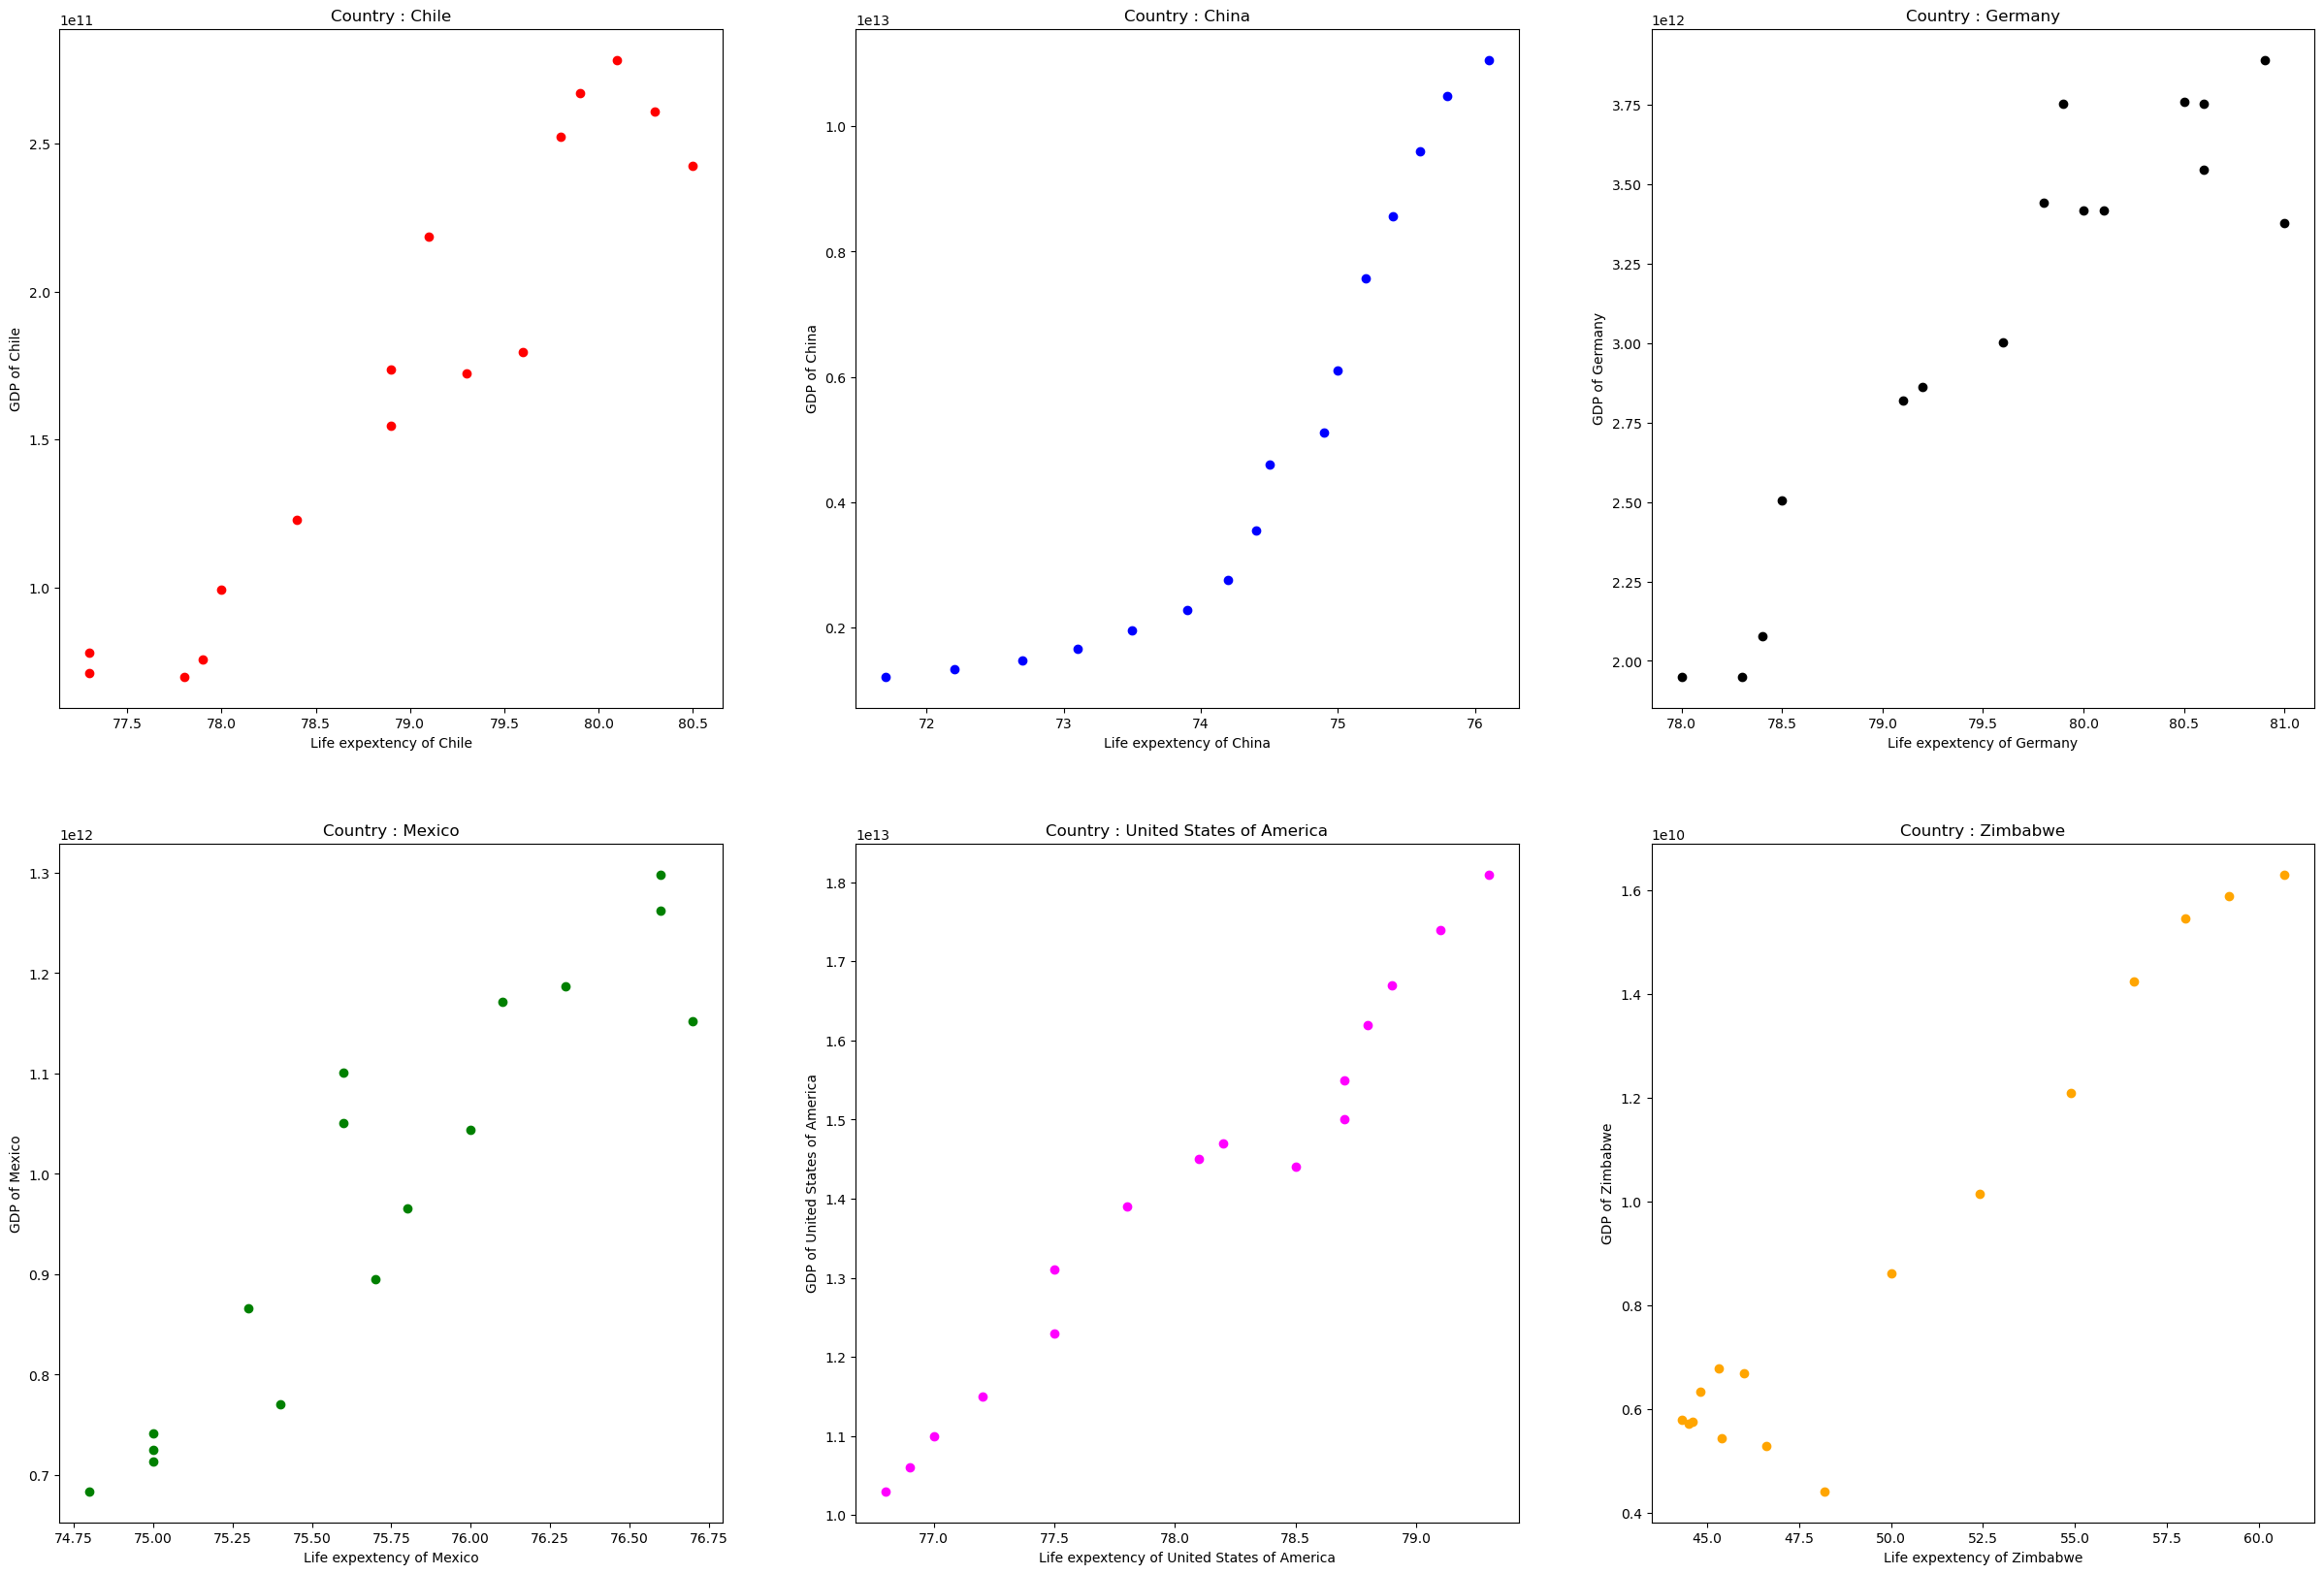

<Figure size 640x480 with 0 Axes>

In [16]:
#Creating a canvas to plot all the graphs at one place
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))
#Variables for postions
x=0
y=0
#Using different colours to plot our graph
colors=[['red','blue','black'],['green','magenta','orange']]
#Iterating through the list of all countries in df
for i in df.Country.unique().tolist():
    fdf=df[df['Country']==i]
    axes[x,y].scatter(x=fdf.life_exp,y=fdf.GDP,color=colors[x][y])
    axes[x,y].set_xlabel(f"Life expextency of {i}")
    axes[x,y].set_ylabel(f"GDP of {i}")
    axes[x,y].set_title(f"Country : {i}")
    if y == 2:
        y=0
        x=1
    else:
        y+=1
    #Finding pearson correlation and p_value
    corr,p_value=st.pearsonr(fdf.GDP,fdf.life_exp)
    print(f"The Correlation of {i}'s GDP and Life expectancy is ",corr) 
plt.show()
plt.clf()

#### Observations

From these plot we can see that:

+ There is a strong correlation between a conuntry's GDP and its Life expectancy in all countries
+ Initally China's life expectancy increase rapidly upto 74 years and then its GDP increases rapidly
+ USA shows almost linear increament in GDP and life expectency 

### Comparing every country's GDP with life expectancy

Plotting a scatter plot of each country's GDP and their life expectancy

Text(0.5, 1.0, 'GDP vs life expectancy')

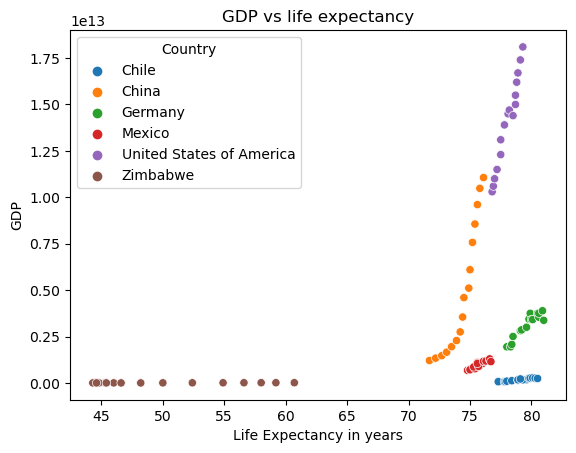

In [6]:
# Creating a multivariate scatterplot 
sns.scatterplot(x='life_exp',y='GDP',hue='Country',data=df)
plt.xlabel("Life Expectancy in years")
plt.ylabel("GDP")
plt.title("GDP vs life expectancy")

#### Observations

From the following graph we can observe that:
+ Zimbabwe had the highest increase in the life expectancy with the least amount of increase in its GDP
+ China had a significant increse in its GDP comparing its increase with other countries
+ Mexico had very less increase in both life expectancy as well as its GDP

### Comparing Life expectancies of Countries throught the years

First let's plot a line graph to show the increase in life expectancies of all countries.  

Next, let's plot Bar graph comparing the Inital,Final and Average life expectancies of all the countries .

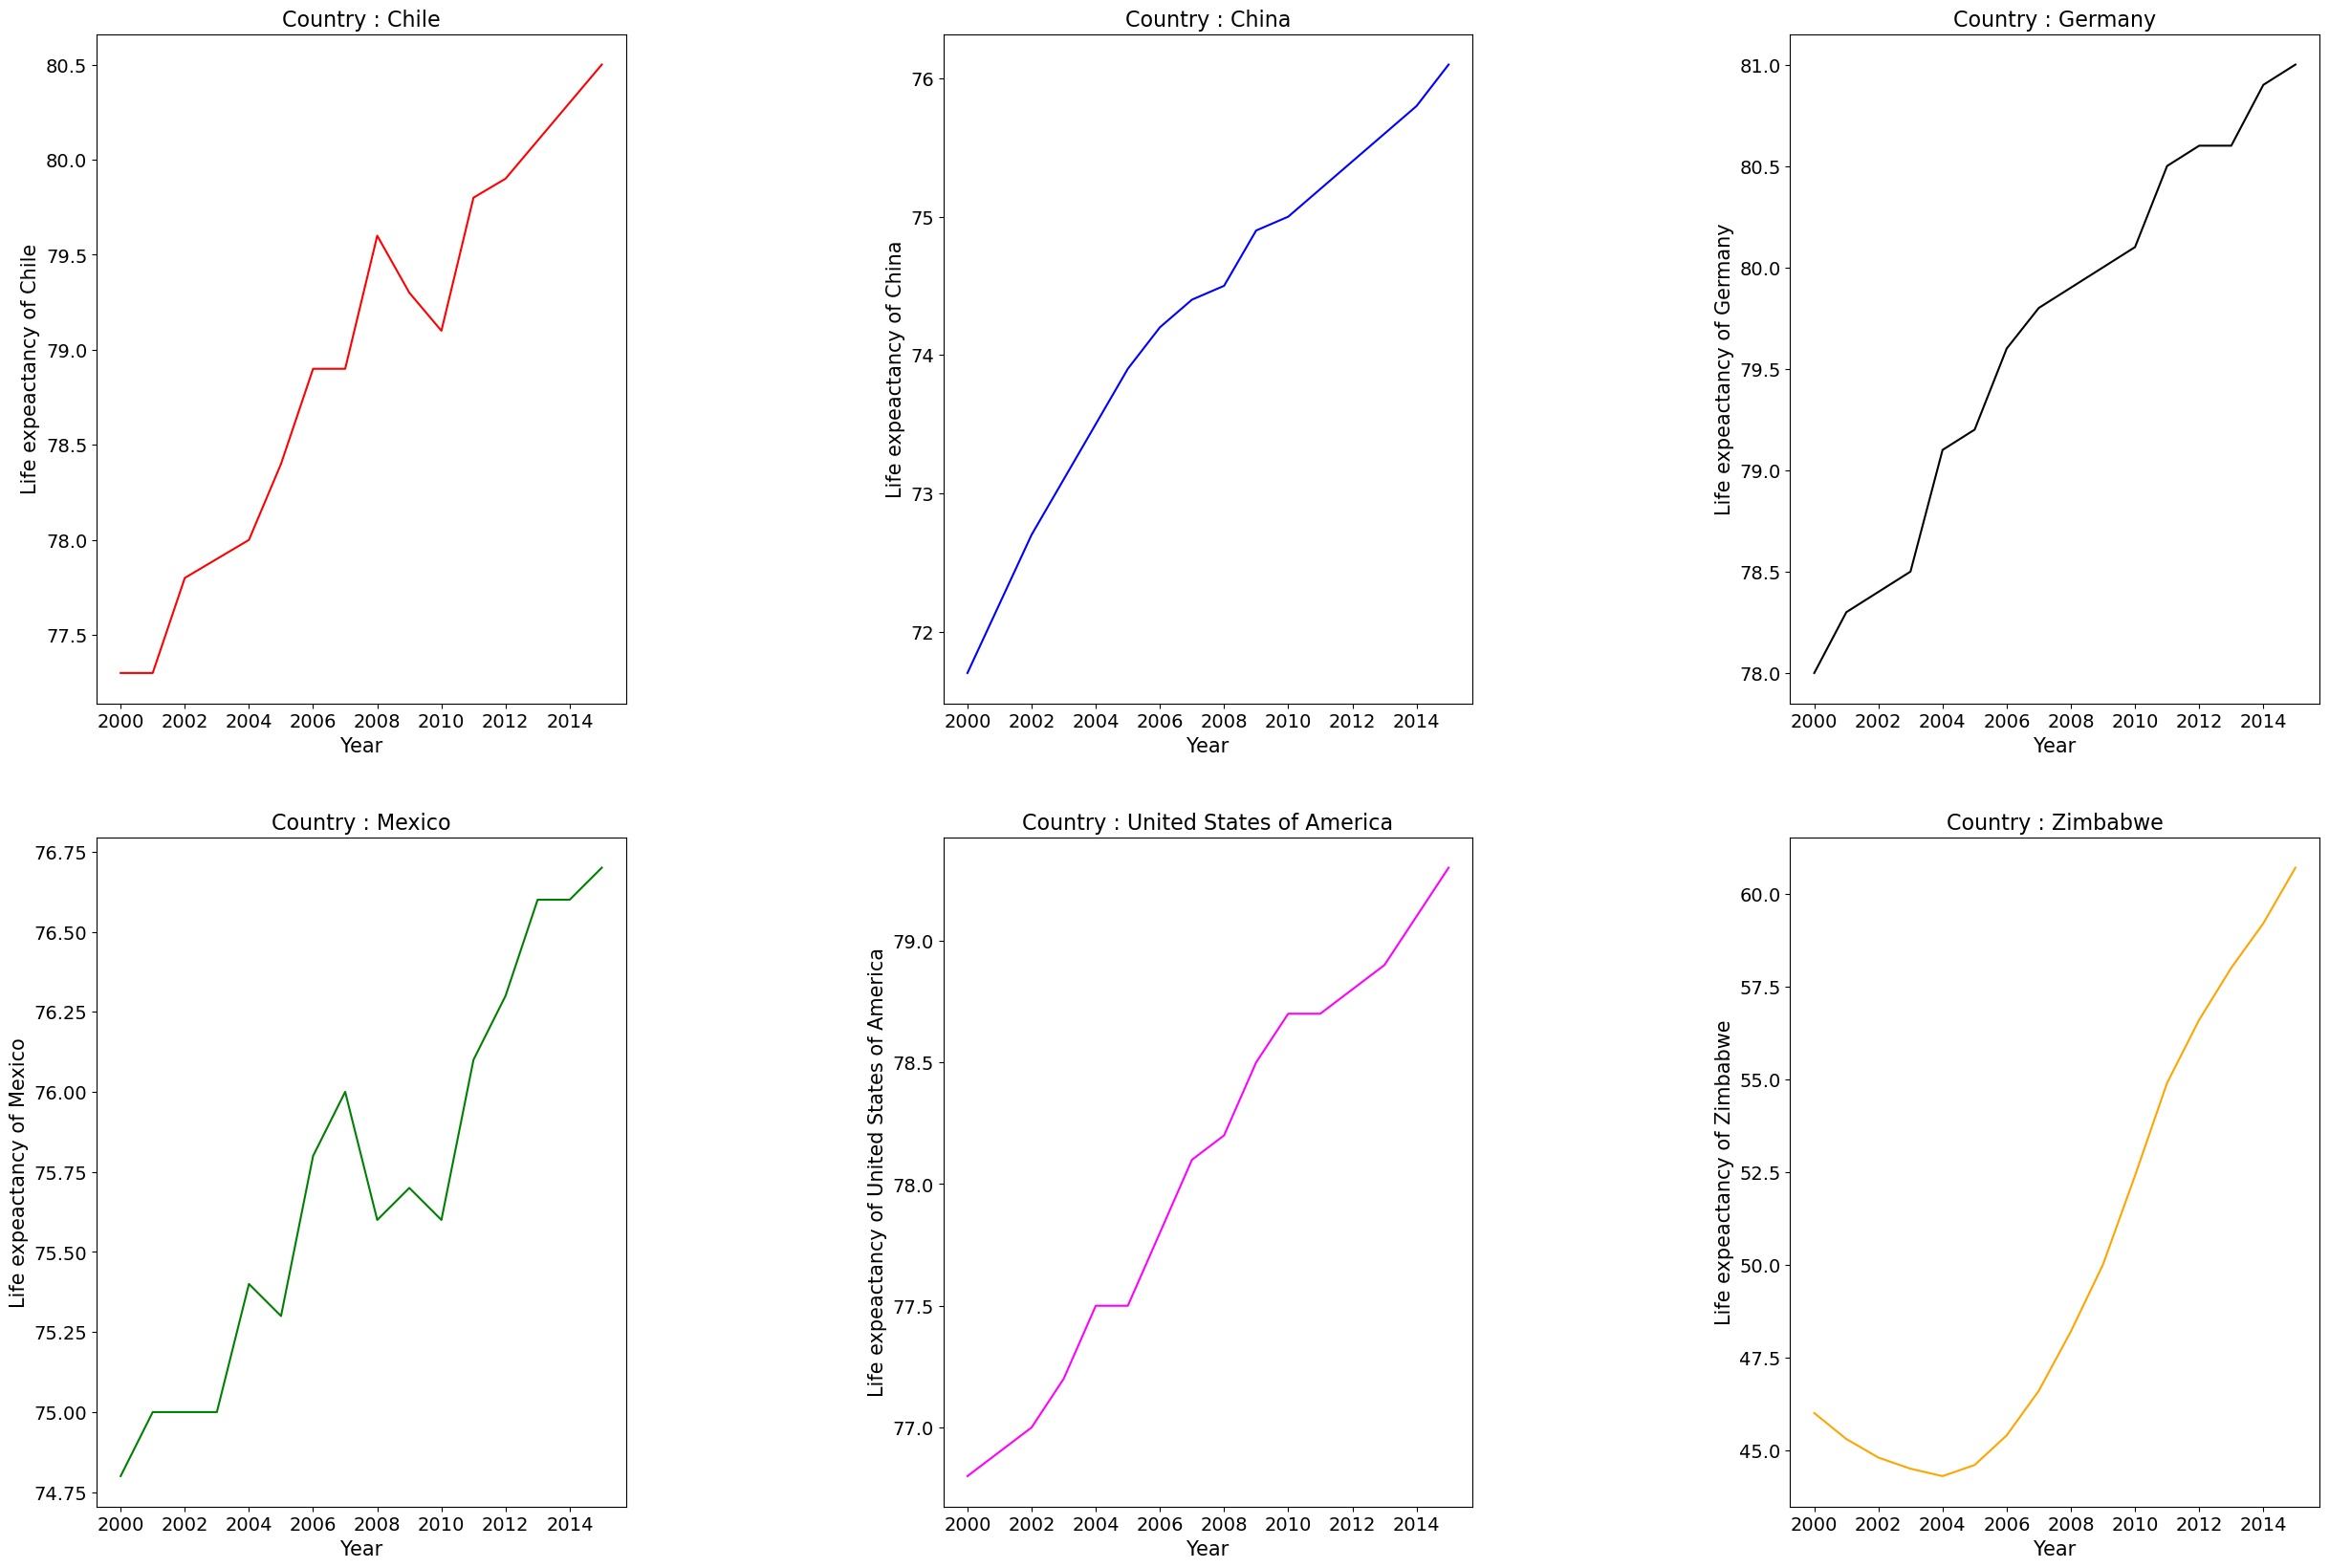

In [32]:
#Plotting line graph of all the countries
colors=['red','blue','black','green','magenta','orange']
count=1
plt.figure(figsize=(30,20))
for i in df.Country.unique().tolist():
    fdf=df[df.Country==i]
    plt.subplot(2,3,count)
    plt.subplots_adjust(wspace=0.6)
    plt.plot(fdf.Year,fdf.life_exp,color=colors[count-1])
    plt.xlabel("Year", fontsize=15)
    plt.ylabel(f"Life expeactancy of {i}", fontsize=15)
    plt.title(f"Country : {i}", fontsize=16)
    # Adjusting the font size of x and y ticks
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    count+=1
plt.show()
plt.close()    

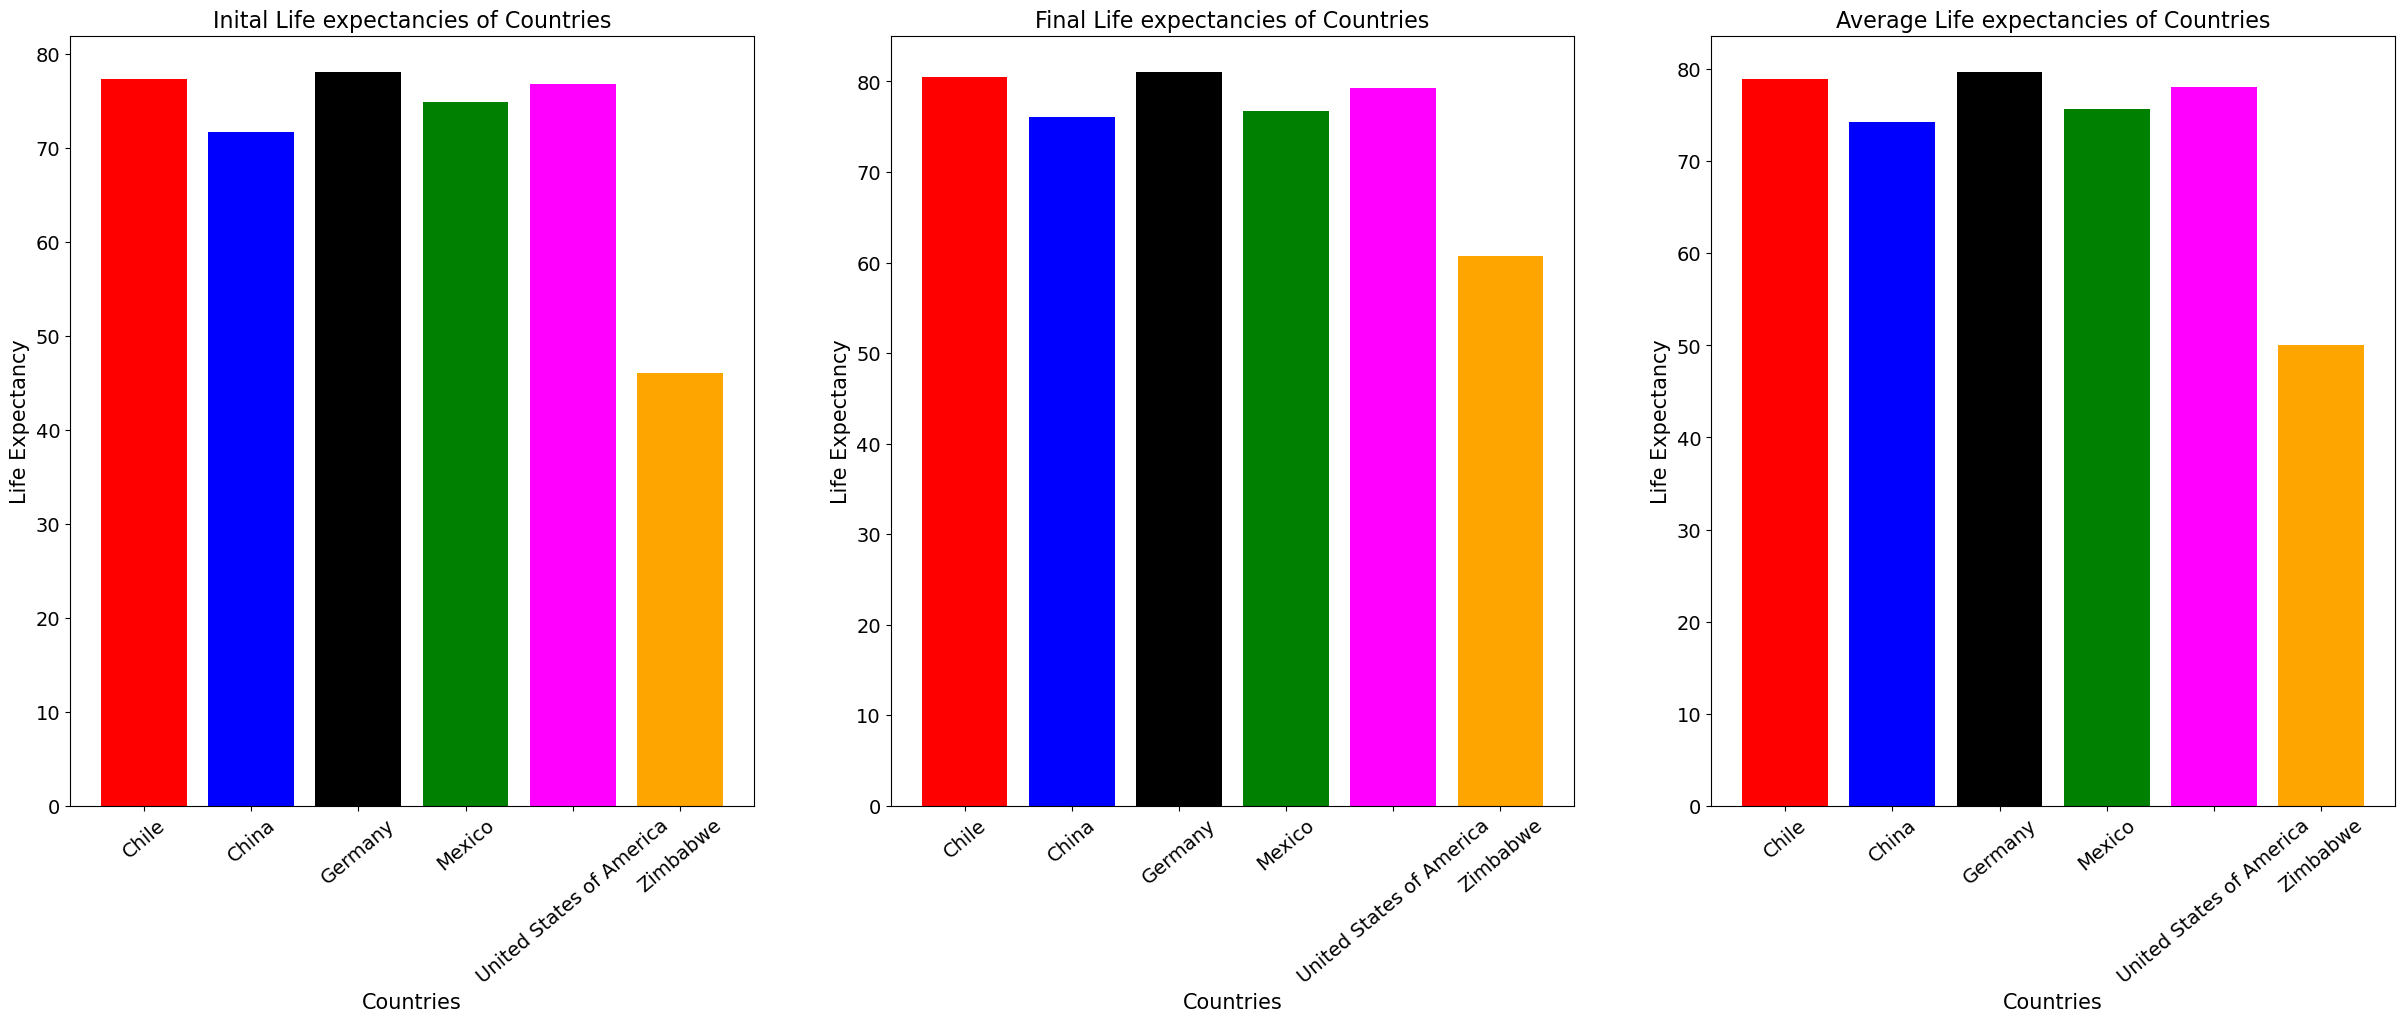

In [45]:
#Plotting a bar graph to Compare Inital life expectancy of countries
plt.figure(figsize=(30,10))
fdf=df[df.Year == 2000]
ax=plt.subplot(1,3,1)
plt.bar(range(fdf.Country.nunique()),fdf.life_exp,color=colors)
plt.title("Inital Life expectancies of Countries",fontsize=16)
ax.set_xticks(range(6))
ax.set_xticklabels(fdf.Country.unique().tolist(),rotation=40)
plt.xlabel("Countries",fontsize=15)
plt.ylabel("Life Expectancy",fontsize=15)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#Plotting a bar graph to Compare FInal life expectancy of countries
ax=plt.subplot(1,3,2)
fdf=df[df.Year==df.Year.max()]
plt.bar(range(fdf.Country.nunique()),fdf.life_exp,color=colors)
plt.title("Final Life expectancies of Countries",fontsize=16)
ax.set_xticks(range(6))
ax.set_xticklabels(fdf.Country.unique().tolist(),rotation=40)
plt.xlabel("Countries",fontsize=15)
plt.ylabel("Life Expectancy",fontsize=15)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#Plotting a bar graph to Compare Average life expectancy of countries
ax=plt.subplot(1,3,3)
plt.bar(range(df.Country.nunique()),df.groupby('Country').life_exp.mean(),color=colors)
plt.title("Average Life expectancies of Countries",fontsize=16)
ax.set_xticks(range(6))
ax.set_xticklabels(fdf.Country.unique().tolist(),rotation=40)
plt.xlabel("Countries",fontsize=15)
plt.ylabel("Life Expectancy",fontsize=15)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.show()
plt.close()

#### Observations

We can see that:
+ Zimbabwe initally has a dip in life expectancy and later picks up and increases the most
+ Countries like USA,China and Germany have relatively smooth increasing curves
+ The life expectancy of Mexico is very volatile as it has many peaks and troughs in the graph

### Comparing GDP's of all countries

Plotting line graphs to represent GDP vs time of all countries.

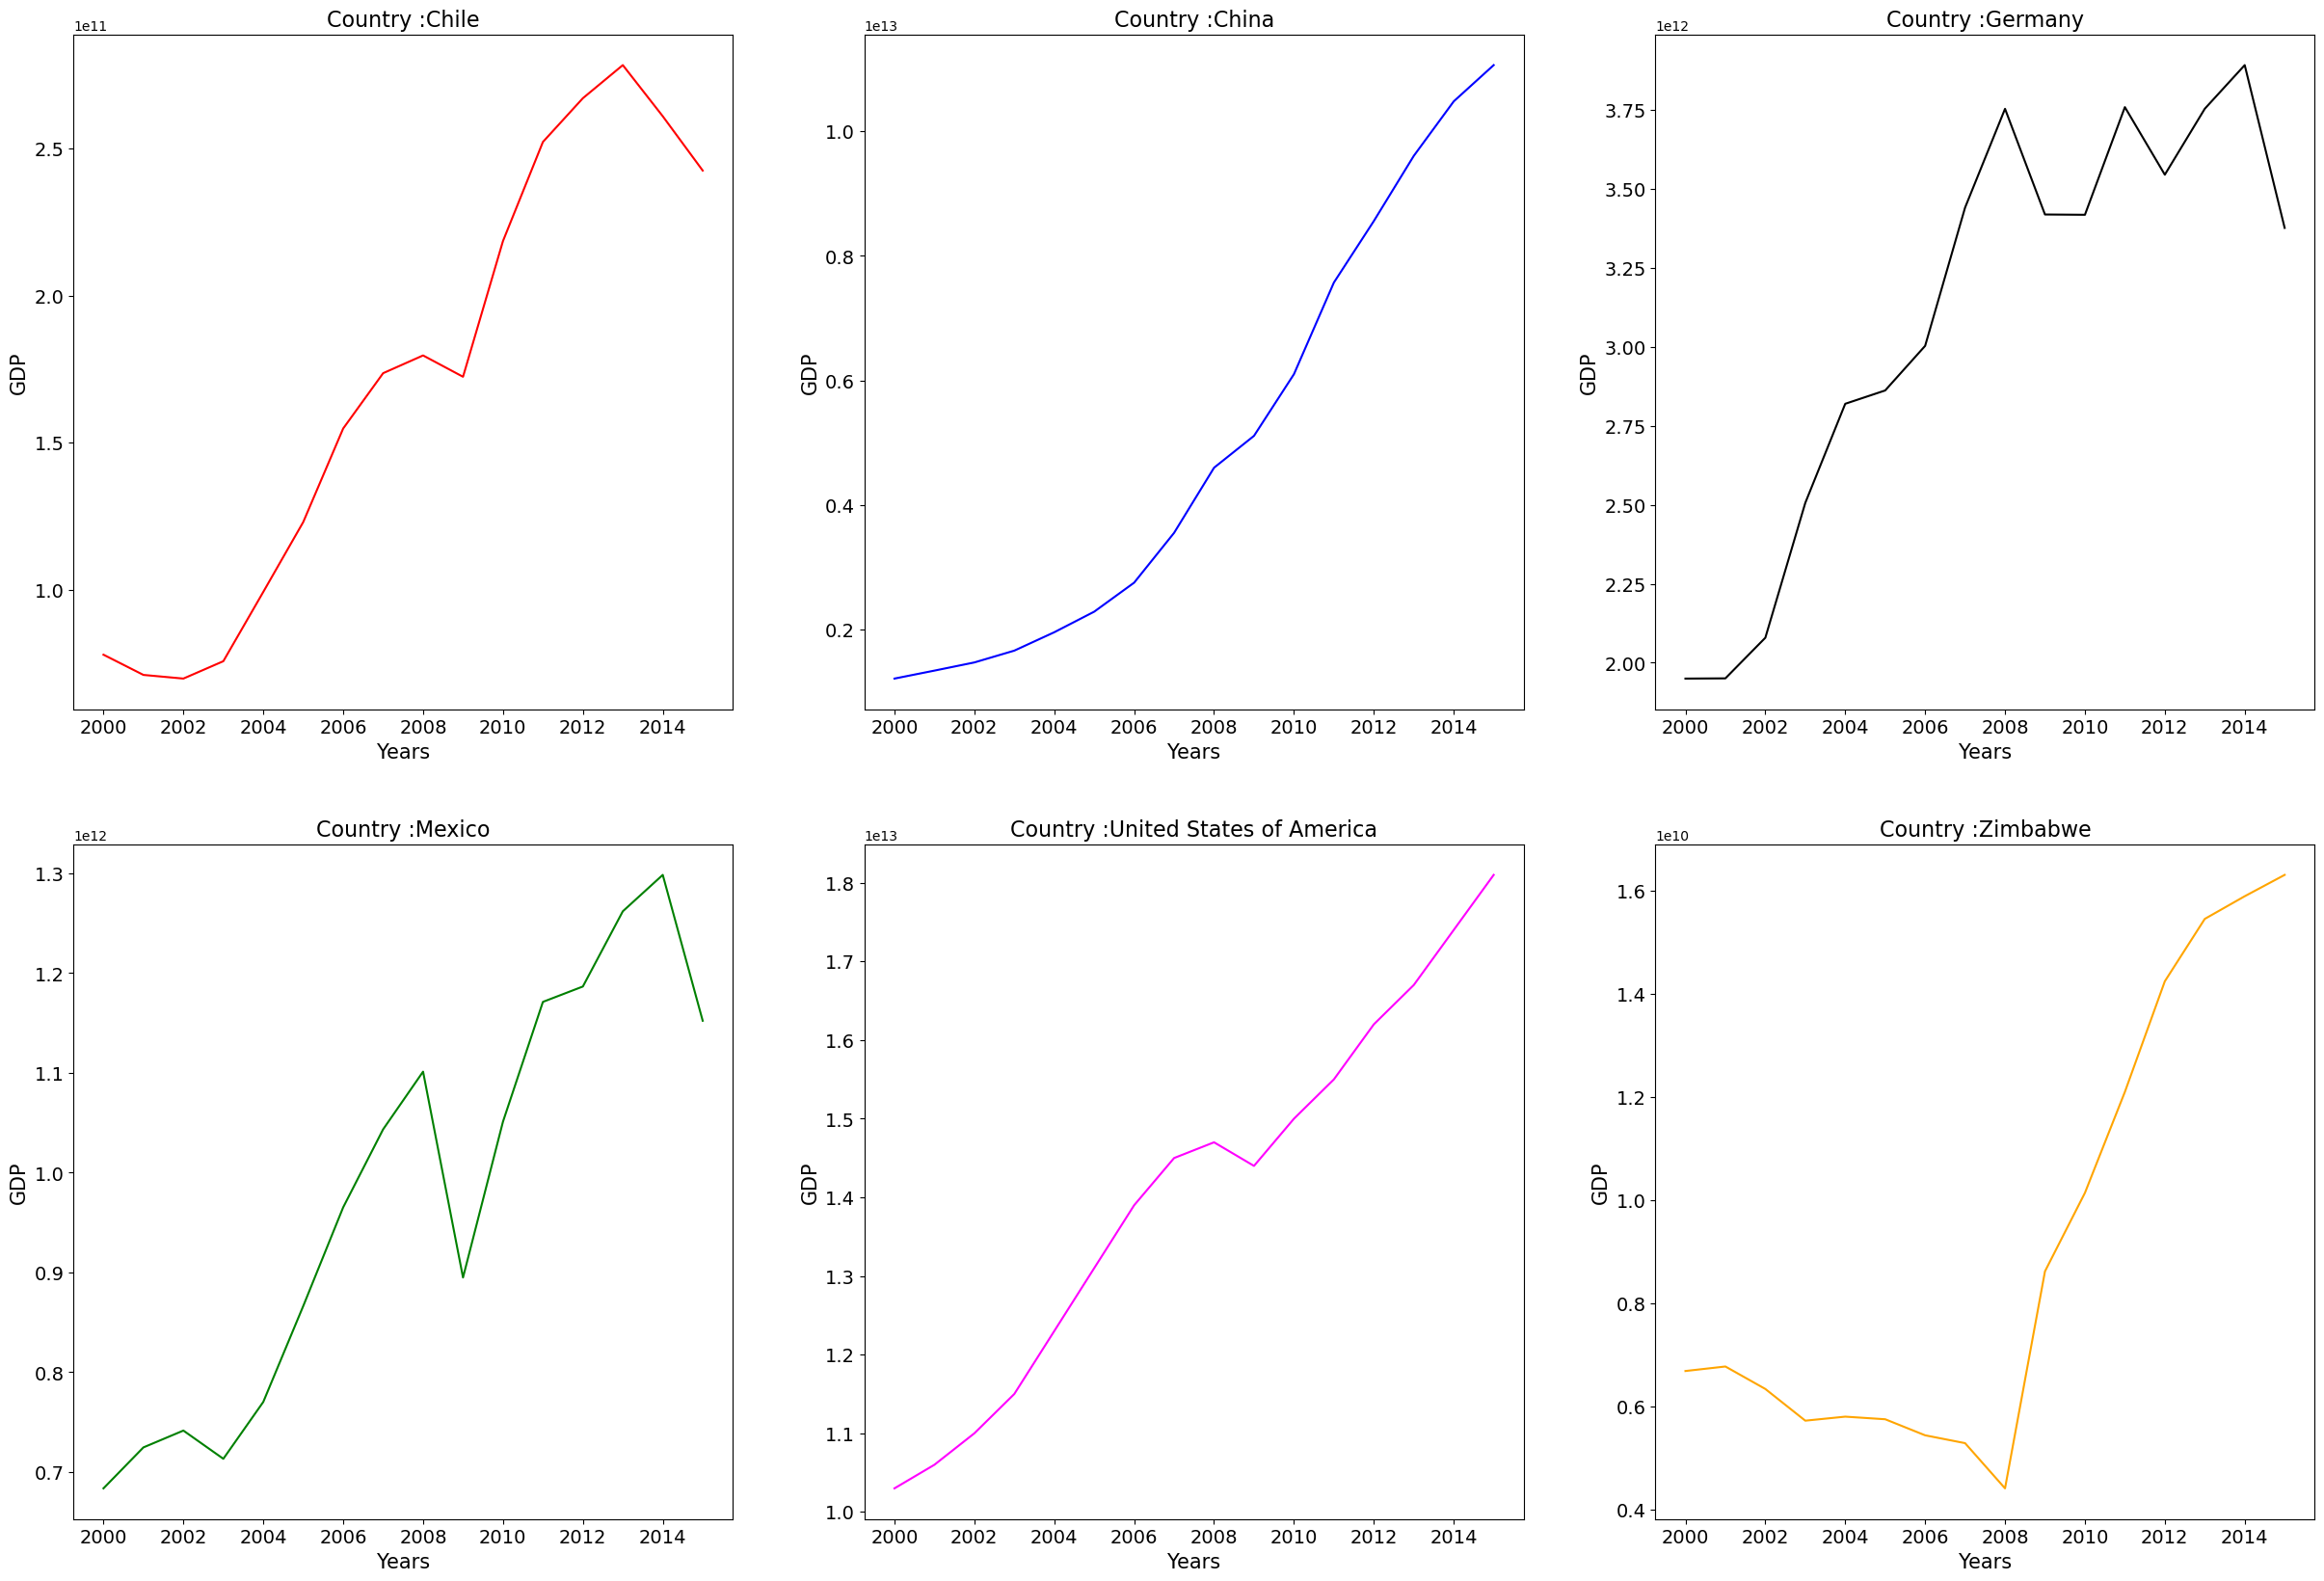

In [47]:
#Plotting Line graphs to compare GDP's of countries
plt.figure(figsize=(30,20))
count=1
for i in df.Country.unique().tolist():    
    fdf=df[df.Country == i]
    plt.subplot(2,3,count)
    plt.plot(fdf.Year,fdf.GDP,color=colors[count-1])
    plt.xlabel("Years",fontsize=15)
    plt.ylabel("GDP",fontsize=15)
    plt.title(f"Country :{i}",fontsize=16)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    count+=1
plt.show()
plt.close()

### Observations
 
From these line plots we can see that:
+ USA's and China's GDP increased the most from 2000 to 2015
+ The Global Economic Crisis(2007-2009) seemed to have affected almost every country except for China
+ Zimbabwe reached its lowest GDP during that time in the year of 2008

## Conclusions

With this project I was able to answer the questions posed in the beginning

Q)What is the relationship between country's GDP Vs  Life Expectancy   
Ans:- There seems to be a strong linear correlation between GDP and life expectancy of country which is evident through graphs as well as the pearson correlation value

Q) Finding countries where life expectency increased eventhough no significant change happened in GDP and vice versa (if any)
Ans:- In Zimbabwe the life expectency incerased a lot w.r.t its GDP , Even in Chile the proportion of increase in life expectancy was way more than its increase in GDP.

Q) Whose life expectancy increased more the country with the worst life expectency or the best  
Ans:- Through our visualizations its quite clear that Zimbabwe(worst life expectency) had increased its life expectancy way more than with the best being Germany.

Q) Comparision of life expectencies of 6 countries in 2000's and their increment in 15 years  
Ans:- All the six countries had an increase in life expectencies and no country has gotten ahead of any other country in their life expectancies

Q) Whose GDP increased the most  
Ans:- In terms of increase in GDP China has increased its GDP the most.